In [172]:
import numpy as np
import pandas as pd

In [173]:
data = pd.read_csv(r'statistics_on_daily_passenger_traffic_20200124-20220207.csv')
data 

,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
0,24/1/2020,Airport,Arrival,20724,9124,14116,43964
1,24/1/2020,Airport,Departure,74876,4451,7242,86569
2,24/1/2020,Express Rail Link West Kowloon,Arrival,1717,2380,337,4434
3,24/1/2020,Express Rail Link West Kowloon,Departure,20096,2800,316,23212
4,24/1/2020,Hung Hom,Arrival,433,470,71,974
...,...,...,...,...,...,...,...
23437,7/2/2022,Kai Tak Cruise Terminal,Departure,0,0,0,0
23438,7/2/2022,Macau Ferry Terminal,Arrival,0,0,0,0
23439,7/2/2022,Macau Ferry Terminal,Departure,0,0,0,0
23440,7/2/2022,Tuen Mun Ferry Terminal,Arrival,0,0,0,0


In [174]:
arrivals = data[data['Arrival / Departure'] == 'Arrival']
departures = data[data['Arrival / Departure'] == 'Departure']
arrivals

,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
0,24/1/2020,Airport,Arrival,20724,9124,14116,43964
2,24/1/2020,Express Rail Link West Kowloon,Arrival,1717,2380,337,4434
4,24/1/2020,Hung Hom,Arrival,433,470,71,974
6,24/1/2020,Lo Wu,Arrival,26340,7383,429,34152
8,24/1/2020,Lok Ma Chau Spur Line,Arrival,16750,4979,196,21925
...,...,...,...,...,...,...,...
23432,7/2/2022,China Ferry Terminal,Arrival,0,0,0,0
23434,7/2/2022,Harbour Control,Arrival,0,0,0,0
23436,7/2/2022,Kai Tak Cruise Terminal,Arrival,0,0,0,0
23438,7/2/2022,Macau Ferry Terminal,Arrival,0,0,0,0


In [175]:
data['Control Point'].unique()

array(['Airport', 'Express Rail Link West Kowloon', 'Hung Hom', 'Lo Wu',
       'Lok Ma Chau Spur Line', 'Hong Kong-Zhuhai-Macao Bridge',
       'Lok Ma Chau', 'Man Kam To', 'Sha Tau Kok', 'Shenzhen Bay',
       'China Ferry Terminal', 'Harbour Control',
       'Kai Tak Cruise Terminal', 'Macau Ferry Terminal',
       'Tuen Mun Ferry Terminal', 'Heung Yuen Wai'], dtype=object)

In [176]:
from datetime import datetime

arrivals.index = pd.to_datetime(arrivals['Date'],format='%d/%m/%Y')
arrivals.groupby(by=[arrivals.index.day])

departures.index = pd.to_datetime(departures['Date'],format='%d/%m/%Y')
departures.groupby(by=[departures.index.day])


departures



,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,,,,
2020-01-24,24/1/2020,Airport,Departure,74876,4451,7242,86569
2020-01-24,24/1/2020,Express Rail Link West Kowloon,Departure,20096,2800,316,23212
2020-01-24,24/1/2020,Hung Hom,Departure,3498,194,51,3743
2020-01-24,24/1/2020,Lo Wu,Departure,72074,6231,413,78718
2020-01-24,24/1/2020,Lok Ma Chau Spur Line,Departure,32215,3766,167,36148
...,...,...,...,...,...,...,...
2022-02-07,7/2/2022,China Ferry Terminal,Departure,0,0,0,0
2022-02-07,7/2/2022,Harbour Control,Departure,0,0,0,0
2022-02-07,7/2/2022,Kai Tak Cruise Terminal,Departure,0,0,0,0


In [177]:
#Classify by control point type
LAND = ['Express Rail Link West Kowloon', 'Hung Hom', 'Lo Wu', 'Lok Ma Chau Spur Line', 'Hong Kong-Zhuhai-Macao Bridge', 'Lok Ma Chau', 'Man Kam To', 'Sha Tau Kok', 'Shenzhen Bay', 'Heung Yuen Wai']
SEA = ['China Ferry Terminal' , 'Harbour Control', 'Kai Tak Cruise Terminal', 'Macau Ferry Terminal', 'Tuen Mun Ferry Terminal']
AIR = ['Airport']

In [178]:
arrivals = arrivals[['Control Point', 'Hong Kong Residents', 'Mainland Visitors',	'Other Visitors', 'Total']]
departures = departures[['Control Point', 'Hong Kong Residents', 'Mainland Visitors',	'Other Visitors', 'Total']]
arrivals

,Control Point,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,,
2020-01-24,Airport,20724,9124,14116,43964
2020-01-24,Express Rail Link West Kowloon,1717,2380,337,4434
2020-01-24,Hung Hom,433,470,71,974
2020-01-24,Lo Wu,26340,7383,429,34152
2020-01-24,Lok Ma Chau Spur Line,16750,4979,196,21925
...,...,...,...,...,...
2022-02-07,China Ferry Terminal,0,0,0,0
2022-02-07,Harbour Control,0,0,0,0
2022-02-07,Kai Tak Cruise Terminal,0,0,0,0


In [179]:
arrivals['Control Point'] = arrivals['Control Point'].map(lambda x : "Air" if x in AIR else "Sea" if x in SEA else "Land")
departures['Control Point'] = departures['Control Point'].map(lambda x : "Air" if x in AIR else "Sea" if x in SEA else "Land")

C:\Users\User\AppData\Local\Temp\ipykernel_76492\3909037895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['Control Point'] = arrivals['Control Point'].map(lambda x : "Air" if x in AIR else "Sea" if x in SEA else "Land")
C:\Users\User\AppData\Local\Temp\ipykernel_76492\3909037895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['Control Point'] = departures['Control Point'].map(lambda x : "Air" if x in AIR else "Sea" if x in SEA else "Land")


In [181]:
test = arrivals['Hong Kong Residents'].iloc[0]

In [185]:
test += 'r'
test

'20724rr'

In [188]:
test = re.sub(r'[^0-9]', '0', test)
test

'2072400'

In [180]:
arrivals

,Control Point,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,,
2020-01-24,Air,20724,9124,14116,43964
2020-01-24,Land,1717,2380,337,4434
2020-01-24,Land,433,470,71,974
2020-01-24,Land,26340,7383,429,34152
2020-01-24,Land,16750,4979,196,21925
...,...,...,...,...,...
2022-02-07,Sea,0,0,0,0
2022-02-07,Sea,0,0,0,0
2022-02-07,Sea,0,0,0,0


In [169]:
import re

In [189]:
arrivals['Hong Kong Residents'] = arrivals['Hong Kong Residents'].astype(str).map(lambda x : re.sub(r'[^0-9]', '0', x)).astype(int)
# arrivals['Mainland Visitors'] = arrivals['Mainland Visitors'].map(lambda x : re.sub(r'\D', x, '0'))
# arrivals['Other Visitors'] = arrivals['Other Visitors'].map(lambda x : re.sub(r'\D', x, '0'))

departures['Hong Kong Residents'] = departures['Hong Kong Residents'].astype(str).map(lambda x : re.sub(r'[^0-9]', '0', x)).astype(int)
# departures['Mainland Visitors'] = departures['Mainland Visitors'].map(lambda x : re.sub(r'\D', x, '0'))
# departures['Other Visitors'] = departures['Other Visitors'].map(lambda x : re.sub(r'\D', x, '0'))

C:\Users\User\AppData\Local\Temp\ipykernel_76492\930413914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['Hong Kong Residents'] = arrivals['Hong Kong Residents'].astype(str).map(lambda x : re.sub(r'[^0-9]', '0', x)).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_76492\930413914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['Hong Kong Residents'] = departures['Hong Kong Residents'].astype(str).map(lambda x : re.sub(r'[^0-9]', '0', x)).astype(int)


In [190]:
arrivals

,Control Point,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,,
2020-01-24,Air,20724,9124,14116,43964
2020-01-24,Land,1717,2380,337,4434
2020-01-24,Land,433,470,71,974
2020-01-24,Land,26340,7383,429,34152
2020-01-24,Land,16750,4979,196,21925
...,...,...,...,...,...
2022-02-07,Sea,0,0,0,0
2022-02-07,Sea,0,0,0,0
2022-02-07,Sea,0,0,0,0


In [192]:
arr_Land = arrivals[arrivals['Control Point'] == "Land"].drop(columns=['Control Point'])
arr_Sea = arrivals[arrivals['Control Point'] == "Sea"].drop(columns=['Control Point'])
arr_Air = arrivals[arrivals['Control Point'] == "Air"].drop(columns=['Control Point'])
dep_Land = departures[departures['Control Point'] == "Land"].drop(columns=['Control Point'])
dep_Sea = departures[departures['Control Point'] == "Sea"].drop(columns=['Control Point'])
dep_Air = departures[departures['Control Point'] == "Air"].drop(columns=['Control Point'])


In [193]:
arr_Land['Hong Kong Residents'] = arr_Land['Hong Kong Residents'].astype(int)
arr_Sea['Hong Kong Residents'] = arr_Sea['Hong Kong Residents'].astype(int)
arr_Air['Hong Kong Residents'] = arr_Air['Hong Kong Residents'].astype(int)
dep_Land['Hong Kong Residents'] = dep_Land['Hong Kong Residents'].astype(int)
dep_Sea['Hong Kong Residents'] = dep_Sea['Hong Kong Residents'].astype(int)
dep_Air['Hong Kong Residents'] = dep_Air['Hong Kong Residents'].astype(int)


In [194]:
arr_Land = arr_Land.groupby(by=[arr_Land.index]).sum()
arr_Sea = arr_Sea.groupby(by=[arr_Sea.index]).sum()
arr_Air = arr_Air.groupby(by=[arr_Air.index]).sum()

dep_Land = dep_Land.groupby(by=[dep_Land.index]).sum()
dep_Sea = dep_Sea.groupby(by=[dep_Sea.index]).sum()
dep_Air = dep_Air.groupby(by=[dep_Air.index]).sum()

In [195]:
arr_Land

,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,
2020-01-24,74018,26067,4291,104376
2020-01-25,63472,20413,3922,87807
2020-01-26,127231,23848,4828,155907
2020-01-27,129565,17534,4288,151387
2020-01-28,124597,16357,3632,144586
...,...,...,...,...
2022-02-03,389,51,13,453
2022-02-04,439,91,14,544
2022-02-05,521,86,10,617


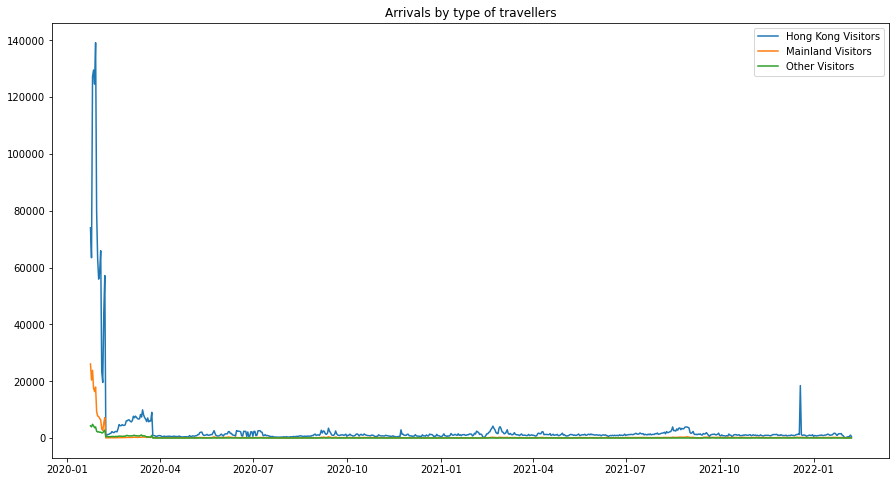

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title("Arrivals by type of travellers")
plt.plot(arr_Land.index, arr_Land['Hong Kong Residents'])
plt.plot(arr_Land.index, arr_Land['Mainland Visitors'])
plt.plot(arr_Land.index, arr_Land['Other Visitors'])
# plt.plot(arr_Land.index, arr_Land['Total'])
plt.legend(['Hong Kong Visitors', 'Mainland Visitors', 'Other Visitors', 'Total'])
plt.show()

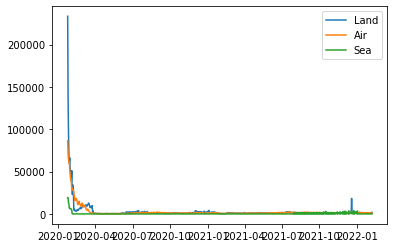

In [59]:
plt.figure()
plt.plot(dep_Land.index, dep_Land['Total'])
plt.plot(dep_Air.index, dep_Air['Total'])
plt.plot(dep_Sea.index, dep_Sea['Total'])
plt.legend(['Land', 'Air', 'Sea'])
plt.show()

In [199]:
dep_Land

,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
Date,,,,
2020-01-24,204301,25267,3849,233417
2020-01-25,113323,22530,3298,139151
2020-01-26,64249,29047,3832,97128
2020-01-27,41991,25559,3867,71417
2020-01-28,35927,20505,3134,59566
...,...,...,...,...
2022-02-03,1071,185,4,1260
2022-02-04,1224,239,14,1477
2022-02-05,1195,262,9,1466


In [200]:
dep_Land.to_csv(r'dep_Land.csv')
dep_Air.to_csv(r'dep_Air.csv')
dep_Sea.to_csv(r'dep_Sea.csv')
arr_Land.to_csv(r'arr_Land.csv')
arr_Air.to_csv(r'arr_Air.csv')
arr_Sea.to_csv(r'arr_Sea.csv')